In [1]:
install.packages("GLMsData")
library(GLMsData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 ### 9

 1.  Write the model matrix $X$ for each design.
 $$
      A = \begin{bmatrix}
      1 & 1 & 1 & 1 & 1 \\
      1 & 1 & -1 & -1 & 0
      \end{bmatrix}^T
$$,  
$$
      B = \begin{bmatrix}
      1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & -1 & -1
      \end{bmatrix}^T,
$$,
$$
      C = \begin{bmatrix}
      1 & 1 & 1 & 1 & 1 \\
      1 & 0.5 & 0 & -0.5 & -1
      \end{bmatrix}^T \\
$$

2.  Use the formula $\text{var}(\hat{\mu}) = \mathbf{x}_g (X^TX) \mathbf{x}^T_g$ with $\mathbf{x}_g = \begin{bmatrix} 1 & x \end{bmatrix}$


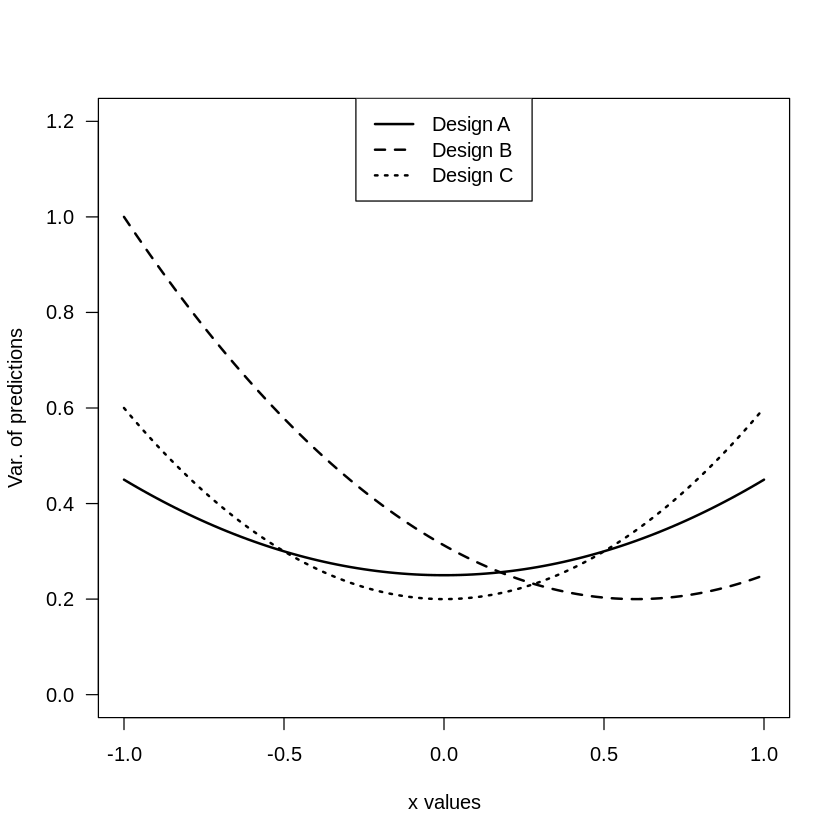

In [2]:
x = seq(-1, 1, length=100)
xA = c(1, 1, -1, -1, 0)
xB = c(1, 1, 1, 1, -1)
xC = c(1, 0.5, 0, -0.5, -1)
varA = function(x){0.25 + x^2/5}
varB = function(x){(5 - 6*x + 5*x^2)/16}
varC = function(x){(1+2*x^2)/5}
vA = varA(x); vB = varB(x); vC = varC(x)
plot( range(c(vA, vB, vC)) ~ range(x), type="n", ylim=c(0, 1.2),
ylab="Var. of predictions", xlab="x values", las=1)
lines(varA(x) ~ x, lty=1, lwd=2)
lines(varB(x) ~ x, lty=2, lwd=2)
lines(varC(x) ~ x, lty=3, lwd=2)
legend("top", lwd=2, lty=1:3, legend=c("Design A", "Design B", "Design C"))

As would be expected from the location of the x values:

-   A produces the most uniform small prediction errors;

-   B produces smaller prediction errors for larger x values;

-   C produces smaller prediction errors in the middle of the range of x values.

### 10

1.  $f(x) = f(\bar{x}) + f'(\bar{x}) (x - \bar{x}) + \frac12 f''(\bar{x}) (x - \bar{x})^2 + ...$
2.  $f(x)$ is linear in $x$, if $x − \bar{x}$ is small.
3.  Any function can be considered locally approximately linear.

### 11

1.  $\log y = \log \mu + \frac{1}{\mu} (y - \mu) - \frac{1}{2\mu^2} (y - \mu) + ...$
2.  If $y \approx \mu$ then $\log y \approx \log \mu$
3.  Self-prove

### 12.

In [3]:
# Set a seed for reproducibility
set.seed(123)

# Number of iterations
num_iterations <- 1000

# Vector to store P-values
p_values <- numeric(num_iterations)

# Perform the iterations
for (i in 1:num_iterations) {
  # Generate random vectors
  y <- rnorm(30)
  x <- rnorm(30)


  # Create a data frame
  data <- data.frame(y = y, x = x)

  # Perform linear regression
  model <- lm(y ~ x, data = data)

  # Extract the P-value for the coefficient of x
  p_values[i] <- summary(model)$coefficients["x", "Pr(>|t|)"]
}

# Calculate proportions
prop_less_than_5_percent <- mean(p_values < 0.05)
prop_less_than_10_percent <- mean(p_values < 0.1)

# Print results
cat("Proportion of P-values less than 5%:", prop_less_than_5_percent, "\n")
cat("Proportion of P-values less than 10%:", prop_less_than_10_percent, "\n")

Proportion of P-values less than 5%: 0.055 
Proportion of P-values less than 10%: 0.107 


### 13

In [4]:
# 1. Determine the degrees of freedom omitted from Table 2.7.
cue.df = 3
sex.df = 1
age.df = 3
residual.df = 60

# 2. Determine how many observations were used in the analysis.
num_samples = residual.df + 4 # p' including constant, cue, sex, age
cat("Number samples: ", num_samples, "\n")

# 3. Find an unbiased estimate of sigma^2
cue.ss = 117793
sex.ss = 2659
age.ss = 22850
RSS = 177639

s2 = RSS / residual.df
cat("An unbiased estimate of sigma^2: ", s2, "\n")

# 4. Determine which explanatory variables are statistically significant for predicting response time, using sequential F-tests
cue.mse = cue.ss / cue.df
cue.ftest = cue.mse / s2

sex.mse = sex.ss / sex.df
sex.ftest = sex.mse / s2

age.mse = age.ss / age.df
age.ftest = age.mse / s2

cat("F-test: \n")
cue.ftest; sex.ftest; age.ftest

Number samples:  64 
An unbiased estimate of sigma^2:  2960.65 
F-test: 


[1] 13.26207

[1] 0.8981136

[1] 2.572633

In [5]:
# 6. AIC = nlog(RSS/n) + 2p', BIC = nlog(RSS/n) + p'log(n)

AIC = function(RSS, n, p){n*log(RSS/n) + 2*p}
BIC = function(RSS, n, p){n*log(RSS/n) + p*log(n)}

AIC(cue.ss, num_samples, cue.df + 1); AIC(sex.ss, num_samples, sex.df + 1); AIC(age.ss, num_samples, age.df + 1)

[1] 489.1393

[1] 242.5166

[1] 384.1807

In [6]:
# 7
BIC(cue.ss, num_samples, cue.df + 1); BIC(sex.ss, num_samples, sex.df + 1); BIC(age.ss, num_samples, age.df + 1)

[1] 497.7748

[1] 246.8344

[1] 392.8162

### 15

In [8]:
data(flowers); head(flowers)

,Flowers,Light,Timing
,<dbl>,<int>,<fct>
1,62.4,150,PFI
2,77.1,150,PFI
3,77.7,150,Before
4,75.4,150,Before
5,55.7,300,PFI
6,54.2,300,PFI


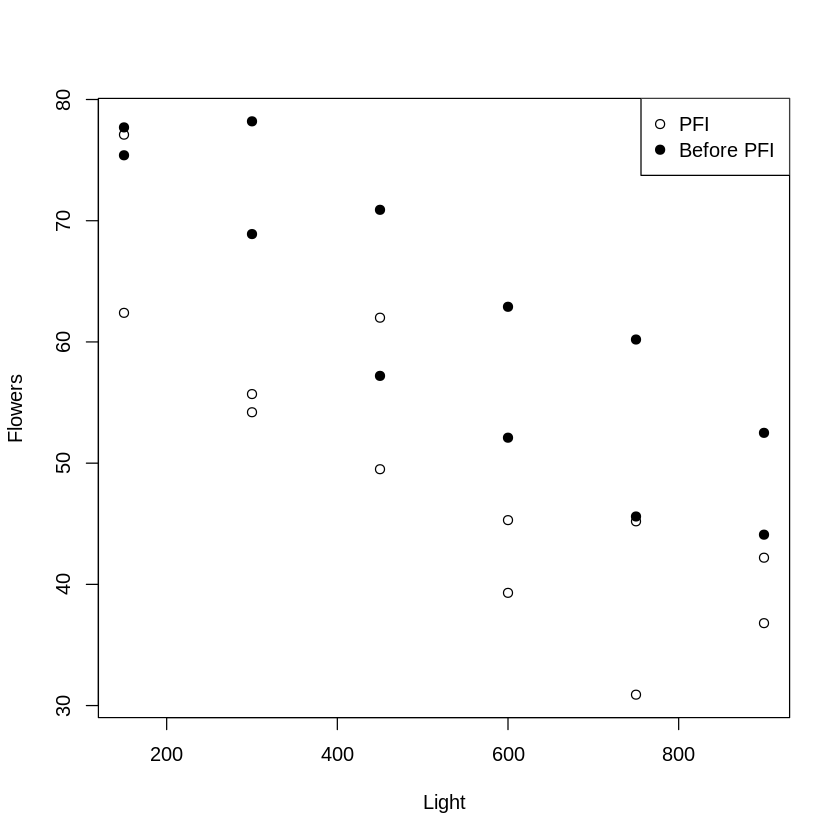

In [9]:
wts = rep(10, length(flowers$Light) )
# 1
plot(Flowers ~ Light, data=flowers, pch=ifelse(Timing=="PFI", 1, 19))
legend("topright", pch=c(1, 19), legend=c("PFI","Before PFI"))

# 2. The relationship between the number of flowers per plant and light intensity has different intercepts for the different timings, but the same slope
# 3. The relationship between the number of flowers per plant and light intensity has different intercepts and different slopes for the different timings

In [10]:
# 4
m1 = lm(Flowers~Light+Timing, data=flowers, weights=wts); anova(m1)
m2 = lm(Flowers~Light*Timing, data=flowers, weights=wts); anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Light,1,25821.789,25821.7889,61.64538,1.110707e-07
Timing,1,8772.504,8772.5042,20.94295,1.638763e-04
Residuals,21,8796.403,418.8763,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Light,1,25821.788929,25821.788929,58.74033635,2.246236e-07
Timing,1,8772.504167,8772.504167,19.95600873,2.361406e-04
Light:Timing,1,4.560357,4.560357,0.01037406,9.198875e-01
Residuals,20,8791.842381,439.592119,NA,NA


In [11]:
# 5
m1.nw = lm(Flowers~Light+Timing, data=flowers); anova(m1.nw)
m2.nw = lm(Flowers~Light*Timing, data=flowers); anova(m2.nw)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Light,1,2582.1789,2582.17889,61.64538,1.110707e-07
Timing,1,877.2504,877.25042,20.94295,1.638763e-04
Residuals,21,879.6403,41.88763,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Light,1,2582.1788929,2582.1788929,58.74033635,2.246236e-07
Timing,1,877.2504167,877.2504167,19.95600873,2.361406e-04
Light:Timing,1,0.4560357,0.4560357,0.01037406,9.198875e-01
Residuals,20,879.1842381,43.9592119,NA,NA


In [12]:
summary(m1); summary(m1.nw)


Call:
lm(formula = Flowers ~ Light + Timing, data = flowers, weights = wts)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.748 -12.428  -5.753  17.668  37.524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.47 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08



Call:
lm(formula = Flowers ~ Light + Timing, data = flowers)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


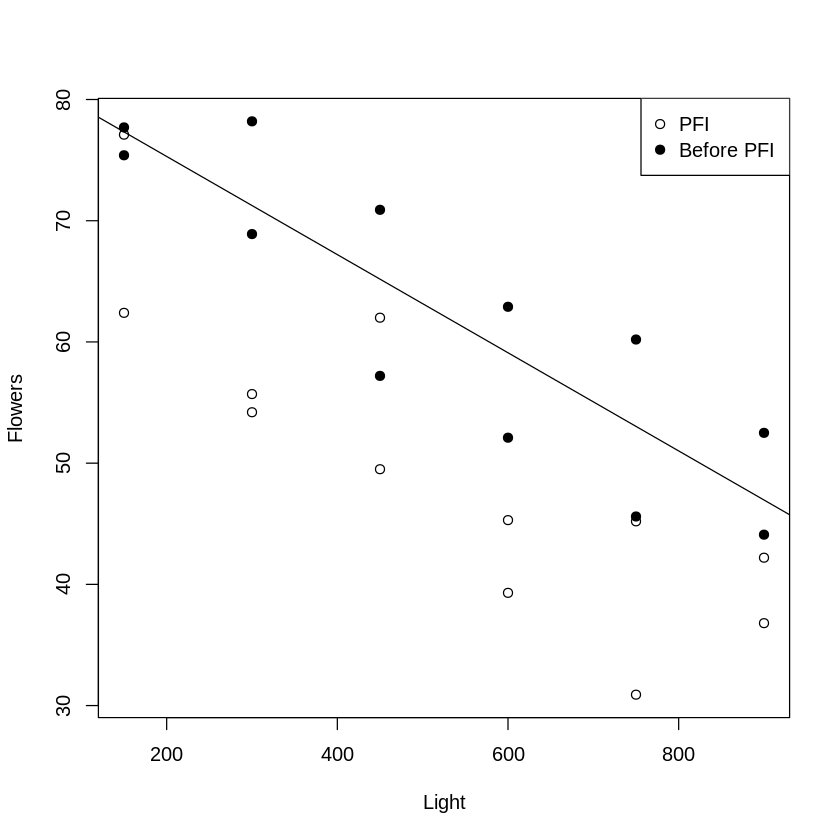

In [13]:
plot(Flowers ~ Light, data=flowers, pch=ifelse(Timing=="PFI", 1, 19))
legend("topright", pch=c(1, 19), legend=c("PFI","Before PFI"))
abline(coef(m1)[1], coef(m1)[2], lty=1)
# abline(sum(coef(m1)[c(1, 3)]), coef(m1)[2], lty=2)